In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Dict
from IPython.display import display, HTML
from scipy.stats import hypergeom
from pylab import rcParams
import os
import glob
from scipy.stats import ttest_ind
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import math

In [78]:
#Data preprocessing
folder = "data_expand"
pathCTRL = glob.glob(os.path.join(folder, "*CTRL*"))
pathPD = glob.glob(os.path.join(folder, "*PD*"))

def read_data(path):
    df_first = pd.read_csv(path[0], sep = "\t")
    df = pd.DataFrame(df_first["RPKM"]).T
    df.columns = df_first["Gene_Symbol"]
    df.index = [path[0]]
    
    for i in range(1, len(path)):
        data = pd.read_csv(path[i], sep = "\t")
        rpkm = pd.DataFrame(data["RPKM"]).T
        rpkm.columns = df_first["Gene_Symbol"]
        rpkm.index = [path[i]]
        df = df.append(rpkm)
        
    return df

dfCTRL_raw = read_data(pathCTRL)
dfCTRL_raw = dfCTRL_raw.loc[:,~dfCTRL_raw.columns.duplicated()]
dfPD_raw = read_data(pathPD)
dfPD_raw = dfPD_raw.loc[:,~dfPD_raw.columns.duplicated()]
gene_names_raw = dfCTRL_raw.columns
dfPD_raw = dfPD_raw.drop(["47.11"], axis = 1)
dfCTRL_raw = dfCTRL_raw.drop(["47.11"], axis = 1)
dfPD_raw

Gene_Symbol,SEPT1,SEPT2,SEPT3,SEPT4,SEPT5,SEPT6,SEPT7,SEPT8,SEPT9,SEPT10,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
data_expand/GSM3014978_Tissue_PD7.txt,0.43865,7.00563,111.35802,19.86348,183.77884,6.81742,15.94402,26.40958,56.32654,1.63320,...,1.49765,0.31335,1.72833,3.19654,3.01113,0.00000,13.11115,10.89987,5.86444,2.14022
data_expand/GSM3014977_Tissue_PD6.txt,0.47832,8.80831,113.60220,7.85844,213.43886,4.54657,14.06000,22.71885,48.13116,1.64392,...,1.42393,0.25806,2.08665,3.84347,3.54910,0.00000,11.59415,11.44431,6.65056,2.05823
data_expand/GSM3014976_Tissue_PD5.txt,0.39355,8.43742,104.34542,16.32693,156.15567,5.64802,13.88376,23.34562,60.28115,1.69071,...,0.93094,0.57965,1.93327,2.86079,3.68917,0.00000,10.75031,12.56459,6.64759,2.44737
data_expand/GSM3014972_Tissue_PD1.txt,0.85004,8.58055,92.17522,12.41373,212.93575,6.14646,11.89313,24.04431,55.32007,1.74475,...,0.98566,1.11786,1.99478,2.71992,3.79775,0.00000,8.73234,13.59602,7.25737,2.00129
data_expand/GSM3014974_Tissue_PD3.txt,0.55305,10.08789,93.65866,11.21986,136.40479,5.09709,15.76046,19.28194,60.65788,2.10347,...,1.11584,0.60770,2.53797,3.27631,3.60076,0.00662,10.50478,18.18748,6.24933,2.28925
data_expand/GSM3014975_Tissue_PD4.txt,0.35101,6.86576,117.77967,9.37787,174.42136,5.25818,13.29946,25.20505,53.19409,1.82728,...,0.77213,0.43445,2.56803,2.96933,3.70729,0.01855,12.66732,7.82868,6.37906,2.19002
data_expand/GSM3014973_Tissue_PD2.txt,0.62665,7.61188,96.45425,21.76822,184.59637,6.12232,11.81524,27.99758,41.69527,1.68054,...,0.82572,0.83242,2.56976,2.85315,3.99335,0.00000,8.93716,16.47454,7.97357,2.32685
data_expand/GSM3014979_Tissue_PD8.txt,1.06396,15.26071,99.07896,11.76152,175.36169,3.90978,12.80829,18.87492,53.79146,2.38891,...,0.55867,0.72159,3.27409,2.99468,4.28419,0.05410,7.24106,14.07481,6.37525,2.11468


In [111]:
(tscore, pval) = ttest_ind(dfPD_raw, dfCTRL_raw, axis = 0)
avg_pd = np.mean(dfPD_raw, axis = 0)
avg_ctrl = np.mean(dfCTRL_raw, axis = 0)
logfoldchange = np.log2((avg_pd - avg_ctrl) / avg_ctrl)
logfoldchange = np.nan_to_num(logfoldchange)
outputdf = np.vstack((pval, logfoldchange))
outputdf.shape
np.savetxt( "volcano.csv", outputdf, delimiter=',', header='pval,log')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log2
  after removing the cwd from sys.path.


[0.98828876 0.12994803 0.06782125 0.71100014 0.86523359 0.60611691
 0.19463844 0.53474979 0.06390847]


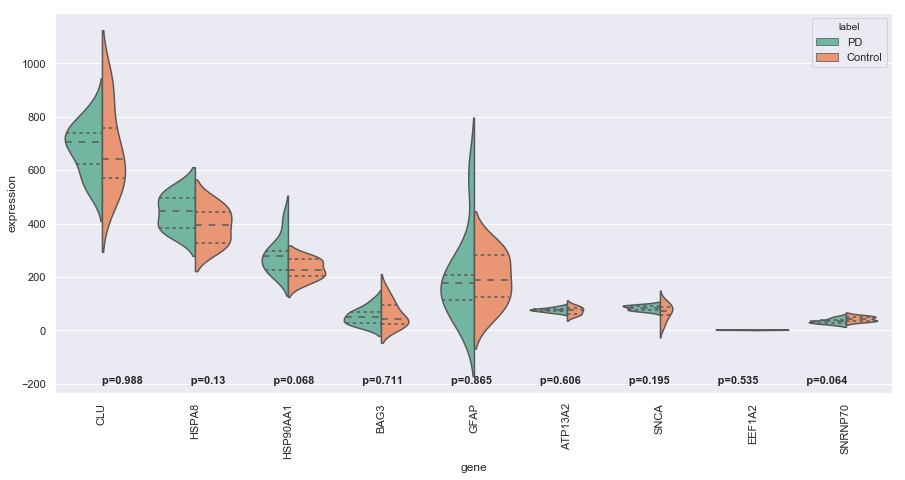

In [138]:
#Violin plot, Plot the genes of interest
gois = ["CLU", "HSPA8", "HSP90AA1", "BAG3", "GFAP", "ATP13A2", "SNCA", "EEF1A2", "SNRNP70"]

(tscore, pval) = ttest_ind(dfPD_raw[gois], dfCTRL_raw[gois], axis = 0)
print(pval)
pvals = ["p=" + str(round(i, 3)) for i in pval]
pval_text = "                ".join(pvals)
violin_df = dfPD_raw[gois]
violin_df = violin_df.append(dfCTRL_raw[gois])
violin_df["label"] = ["PD"] * 8 + ["Control"] * 8
violin_df2 = pd.DataFrame(columns = ["gene", "expression","label"])
for i in range(16):
    for j in range(len(gois)):
        tempframe = pd.DataFrame([[gois[j], violin_df[gois[j]][i], violin_df["label"][i]]], columns = ["gene", "expression","label"])
        violin_df2 = violin_df2.append(tempframe)
violin_df2
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.violinplot(x="gene", y="expression", hue = "label", data=violin_df2, split = True, 
                    palette="Set2", inner="quartile")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.text(x=0, y=-200, s = pval_text, fontsize=11, fontweight = "bold")
plt.show()

In [2]:
# Filter by variance
np_pd = dfPD_raw.to_numpy()
vt = VarianceThreshold() #create a variance threshold obj
vt.fit(np_pd)
var_pd = vt.variances_
var_pd_id = [int(x) for x in var_pd > 1]
pd_feature_idx = np.nonzero(var_pd_id)[0]
num_genes_filtered = len(pd_feature_idx)

gene_names_filtered = [gene_names_raw[i] for i in pd_feature_idx]
dfPD_filtered = dfPD_raw[gene_names_filtered]
dfCTRL_filtered = dfCTRL_raw[gene_names_filtered]
dfPD_filtered

Gene_Symbol,SEPT2,SEPT3,SEPT4,SEPT5,SEPT7,SEPT8,SEPT9,27K,71-7A3,A1BG-AS1,...,ZNF841,ZNF91,ZNF92,ZPR1,ZRANB1,ZRSR2,ZSWIM7,ZSWIM8,ZYG11B,ZYX
data_expand/GSM3014978_Tissue_PD7.txt,7.00563,111.35802,19.86348,183.77884,15.94402,26.40958,56.32654,28.50873,1.61174,1.47957,...,3.26099,18.52157,4.29722,19.65215,10.89574,3.12992,6.61278,9.73148,13.11115,10.89987
data_expand/GSM3014977_Tissue_PD6.txt,8.80831,113.60220,7.85844,213.43886,14.06000,22.71885,48.13116,35.66320,1.72229,1.63902,...,3.30664,17.73940,3.22272,15.59982,10.21384,2.93387,6.82123,10.67991,11.59415,11.44431
data_expand/GSM3014976_Tissue_PD5.txt,8.43742,104.34542,16.32693,156.15567,13.88376,23.34562,60.28115,30.66099,1.75968,3.36595,...,3.93535,15.26731,2.77589,15.92118,9.60277,4.56600,4.90292,14.51853,10.75031,12.56459
data_expand/GSM3014972_Tissue_PD1.txt,8.58055,92.17522,12.41373,212.93575,11.89313,24.04431,55.32007,27.76752,1.94658,2.57112,...,3.55463,12.12267,2.62970,14.48674,7.86281,3.18430,5.71988,12.07172,8.73234,13.59602
data_expand/GSM3014974_Tissue_PD3.txt,10.08789,93.65866,11.21986,136.40479,15.76046,19.28194,60.65788,46.47454,3.52379,2.48184,...,5.56390,41.29374,7.80179,14.93553,10.61330,7.00053,4.19230,12.63453,10.50478,18.18748
data_expand/GSM3014975_Tissue_PD4.txt,6.86576,117.77967,9.37787,174.42136,13.29946,25.20505,53.19409,30.73088,1.15402,2.00304,...,3.16484,15.29115,3.35348,16.59546,10.51208,3.64637,5.27393,12.16760,12.66732,7.82868
data_expand/GSM3014973_Tissue_PD2.txt,7.61188,96.45425,21.76822,184.59637,11.81524,27.99758,41.69527,23.90142,2.22882,4.09791,...,4.71254,14.72021,3.21636,14.98292,9.84508,4.41041,7.72934,15.29480,8.93716,16.47454
data_expand/GSM3014979_Tissue_PD8.txt,15.26071,99.07896,11.76152,175.36169,12.80829,18.87492,53.79146,42.41986,4.40387,4.80906,...,6.35556,28.64290,5.30988,10.58191,7.92582,6.81110,5.64038,15.51071,7.24106,14.07481


In [154]:
#T-test
p_values_temp = []
gene_names_temp = []

for i in range(num_genes_filtered):
    (tscore, pval) = ttest_ind(dfPD_filtered[gene_names_filtered[i]], dfCTRL_filtered[gene_names_filtered[i]])
    if pval != None and pval < 0.05:
        p_values_temp.append(pval)
        gene_names_temp.append(gene_names_filtered[i])

num_genes_sig = len(p_values_temp)
p_values_argsort = np.argsort(p_values_temp)
print(p_values_argsort)
p_values, gene_names = [0] * num_genes_sig, [0] * num_genes_sig
for i in range(len(p_values_argsort)):
    order = p_values_argsort[i]
    p_values[i] = p_values_temp[order]
    gene_names[i] = gene_names_temp[order]

#print(p_values, gene_names, len(p_values))
dfPD_sig = dfPD_filtered[gene_names]
dfCTRL_sig = dfCTRL_filtered[gene_names]
dfPD_sig

[298  32  16 178 232  52 190 200 317  33  17 120  75 284 254 289  84 381
 265 119  64 173 247 101 151  38 291 233 167  10 189 122 100  74 194 278
 242  51  68 346 138 359  47 312 328  95 208 168 302  18 320 324 313  93
 228  31 290  94 137   4 297 207 347 106 340 275 294 267 214 349 322 226
 268 146  62 264  79 339  88 103 258 307 338 231 185 374  42 188 114 305
 142  91 323 311 356 111   7 358  53 332  40 248 187 175 270 161  66 285
 102 319 235 357 195 369 113 239 368  96  83 259  60  11 330 256 117 304
 170  30 352 158 255 213 164 177 310 344 373 272  98  87 262 251  15 180
  97 229 303 107  78 350 309 308 133 202 306 109 245  29 171 269  49 108
 198 335 143 220 363 354  46 288 348  44 217 244 130 144 372 337 193 155
 249 318 380  71 199 376 230   8 362 221 315 283 135  80  37 329  65 281
 191  55  26 210   0 123 274 282  23 273 145  61 129  54 299  45 280  89
 209 205 377   3  41 149 126 353   1  67 351 196 223  35  77 300 325  50
 163 157 331 341  85   2 225 379 257 115 139 263 20

Gene_Symbol,PPP1R14A,BAIAP3,ANKRD24,FCHO1,KCNG1,CARNS1,GABRB1,GPC4,RTP5,BANF1,...,AMPH,CACNG7,ACTR3B,CAMK1G,SNX3,ENSG00000255014,APBB2,ENSG00000250444,KIAA0319,YKT6
data_expand/GSM3014978_Tissue_PD7.txt,5.02587,74.00516,6.57124,6.84979,4.35616,4.42526,15.32198,3.48175,2.21214,20.28244,...,53.82116,12.61250,5.74206,42.63795,25.50687,31.93079,10.07507,6.90186,12.02734,9.28187
data_expand/GSM3014977_Tissue_PD6.txt,2.39630,76.25496,7.44116,6.51838,6.31452,1.80682,18.09760,5.47679,4.35391,19.52473,...,49.25381,8.50734,7.06315,35.02695,23.36600,31.17059,9.44785,7.62376,11.10731,9.65985
data_expand/GSM3014976_Tissue_PD5.txt,2.30678,70.09893,8.32538,7.40441,4.10686,3.57526,18.72659,4.84391,2.13072,23.12340,...,49.92081,12.94414,4.36878,37.70447,24.64360,32.71780,10.34757,7.30305,10.26358,8.91792
data_expand/GSM3014972_Tissue_PD1.txt,2.81930,67.12687,7.31185,6.61260,5.89564,3.55099,17.88076,6.14330,3.78923,19.91452,...,51.51921,11.93136,5.62731,32.72292,21.78151,24.35973,10.41714,4.24630,12.67812,6.73372
data_expand/GSM3014974_Tissue_PD3.txt,1.16059,56.57670,5.93953,6.51469,2.51158,1.47106,20.40376,3.80629,1.71527,21.39854,...,46.58438,8.96521,5.02894,31.49260,30.07393,21.87822,7.60781,9.16734,9.73971,8.58211
data_expand/GSM3014975_Tissue_PD4.txt,1.00854,93.23249,4.54392,5.04758,5.78114,1.55257,19.32354,6.54279,5.68981,21.59568,...,65.53799,10.27524,5.48609,39.77959,24.39484,33.58446,9.29263,6.78055,12.68208,10.06576
data_expand/GSM3014973_Tissue_PD2.txt,5.56530,66.19143,8.95267,9.71049,2.43951,6.04668,14.91896,4.68721,2.35480,17.42741,...,47.35584,13.25918,3.50942,31.20883,19.24299,40.18223,11.80124,5.29567,14.19056,7.64743
data_expand/GSM3014979_Tissue_PD8.txt,1.85217,73.08009,8.35552,7.65640,4.49000,2.66473,20.44617,6.46172,2.90428,18.57785,...,40.74385,12.20339,4.03477,30.80441,26.43197,23.80930,8.09370,5.44138,11.18705,7.33989


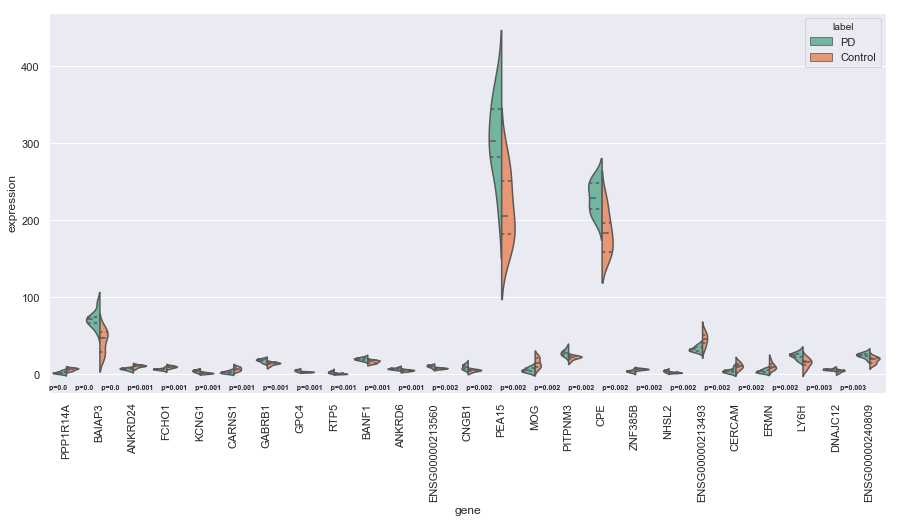

In [159]:
#Violin plot, Plot the most different ones
top_num = 25

violin_df = dfPD_sig[gene_names[:top_num]]
violin_df = violin_df.append(dfCTRL_sig[gene_names[:top_num]])
violin_df["label"] = ["PD"] * 8 + ["Control"] * 8
violin_df2 = pd.DataFrame(columns = ["gene", "expression","label"])
for i in range(16):
    for j in range(top_num):
        tempframe = pd.DataFrame([[gene_names[j], violin_df[gene_names[j]][i], violin_df["label"][i]]], columns = ["gene", "expression","label"])
        violin_df2 = violin_df2.append(tempframe)
sns.set(rc={'figure.figsize':(15,7)})
ax = sns.violinplot(x="gene", y="expression", hue = "label", data=violin_df2, split = True, 
                    palette="Set2", inner="quartile")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
tops = np.sort(p_values_temp)
pvals = ["p=" + str(round(i, 3)) for i in tops[:top_num]]
pval_text = "    ".join(pvals)
ax.text(x=-0.5, y=-20, s = pval_text, fontsize=7, fontweight = "bold")
plt.show()

Explained variation per principal component: [0.68423538 0.14348041]


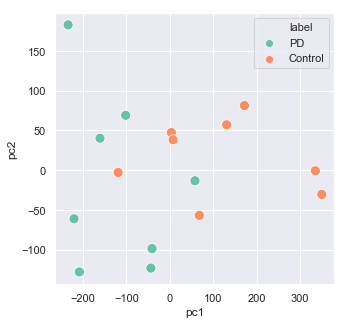

In [194]:
#PCA
dim_df = dfPD_sig.append(dfCTRL_sig)
dim_df["label"] = ["PD"] * 8 + ["Control"] * 8

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dim_df[gene_names].values)
dim_df['pc1'] = pca_result[:,0]
dim_df['pc2'] = pca_result[:,1] 
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_)) #from https://towardsdatascience.com/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(
    x="pc1", y="pc2", hue="label", data=dim_df,
    palette=sns.color_palette("Set2", 2), legend="full", alpha=1, s = 100
)


[t-SNE] Computing 15 nearest neighbors...
[t-SNE] Indexed 16 samples in 0.000s...
[t-SNE] Computed neighbors for 16 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.172306
[t-SNE] KL divergence after 500 iterations: 0.354330


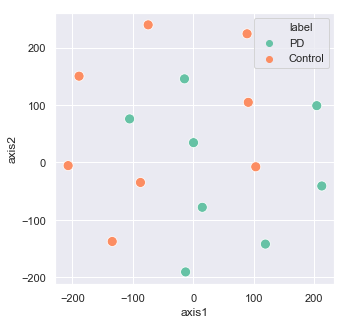

In [208]:
#T-SNE
dim_df2 = dfPD_sig.append(dfCTRL_sig)

tsne = TSNE(n_components=2, verbose=1, perplexity=100, n_iter=500)
tsne_results = tsne.fit_transform(dim_df2)
dim_df2["label"] = ["PD"] * 8 + ["Control"] * 8

dim_df2['axis1'] = tsne_results[:,0]
dim_df2['axis2'] = tsne_results[:,1]
plt.figure(figsize=(5,5))
sns.scatterplot(
    x="axis1", y="axis2", hue="label", data=dim_df2,
    legend="full", palette=sns.color_palette("Set2", 2), alpha=1.0, s = 100
)


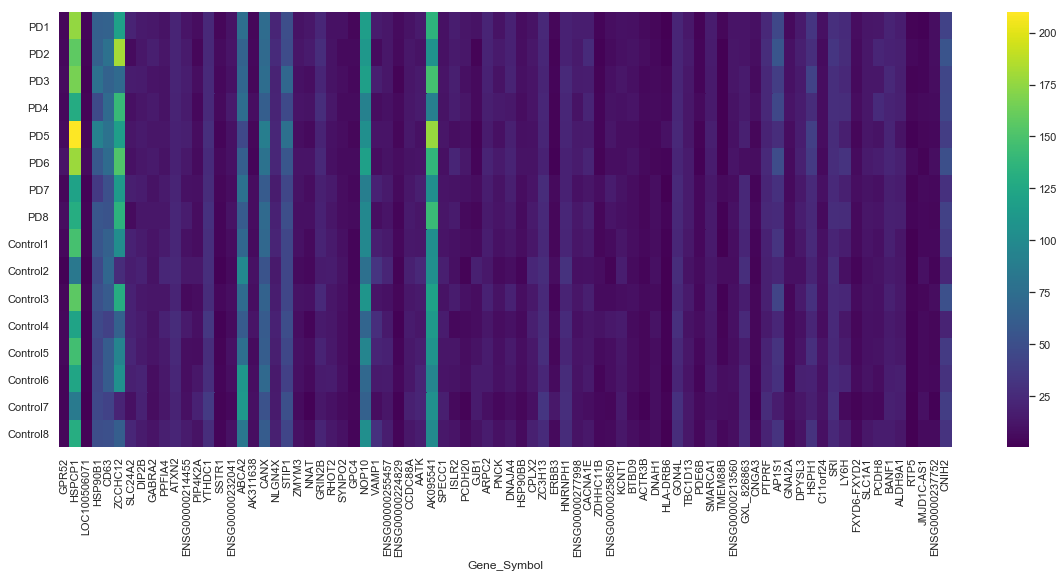

In [217]:
#Heatmap
sns.set(rc={'figure.figsize':(20,8)})
heatmap_df = dfPD_sig.append(dfCTRL_sig)
heatmap_df.index = ["PD" + str(i) for i in range(1,9)] + ["Control" + str(i) for i in range(1,9)]
heatmap_df = heatmap_df[gene_names[:80]]
sns.heatmap(heatmap_df, fmt="g", cmap='viridis')